# Chicago Crimes

By: Evelyn Martinez

## Loading data

In [1]:
## Run the cell below to attempt to programmatically find your crime file
import os,glob

## Getting the home folder from environment variables
home_folder = os.environ['HOME']
# print("- Your Home Folder is: " + home_folder)

## Check for downloads folder
if 'Downloads' in os.listdir(home_folder):
    
    
    # Print the Downloads folder path
    dl_folder = os.path.abspath(os.path.join(home_folder,'Downloads'))
    print(f"- Your Downloads folder is '{dl_folder}/'\n")
    
    ## checking for crime files using glob
    crime_files = sorted(glob.glob(dl_folder+'/**/Crimes_-_2001_to_Present*',recursive=True))
    
    # If more than 
    if len(crime_files)==1:
        RAW_FILE = crime_files[0]
        
    elif len(crime_files)>1:
        print('[i] The following files were found:')
        
        for i, fname in enumerate(crime_files):
            print(f"\tcrime_files[{i}] = '{fname}'")
        print(f'\n- Please fill in the RAW_FILE variable in the code cell below with the correct filepath.')

else:
    print(f'[!] Could not programmatically find your downloads folder.')
    print('- Try using Finder (on Mac) or File Explorer (Windows) to navigate to your Downloads folder.')

- Your Downloads folder is '/Users/evelynmartinez/Downloads/'



In [2]:
RAW_FILE = (r'/Users/evelynmartinez/Downloads/Crimes_-_2001_to_Present_20231102.csv')

RAW_FILE

'/Users/evelynmartinez/Downloads/Crimes_-_2001_to_Present_20231102.csv'

In [3]:
## (Optional) SET THE FOLDER FOR FINAL FILES
OUTPUT_FOLDER = 'Data/Chicago/'
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

In [4]:
import pandas as pd

chicago_full = pd.read_csv(RAW_FILE)
chicago_full

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,5741943,HN549294,08/25/2007 09:22:18 AM,074XX N ROGERS AVE,0560,ASSAULT,SIMPLE,OTHER,False,False,...,49.0,1.0,08A,NaN,NaN,2007,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,1930689,HH109118,01/05/2002 09:24:00 PM,007XX E 103 ST,0820,THEFT,$500 AND UNDER,GAS STATION,True,False,...,NaN,NaN,06,NaN,NaN,2002,02/04/2016 06:33:39 AM,NaN,NaN,NaN
2,13203321,JG415333,09/06/2023 05:00:00 PM,002XX N Wells st,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,42.0,32.0,14,NaN,NaN,2023,09/14/2023 03:43:09 PM,NaN,NaN,NaN
3,13210088,JG423627,08/31/2023 12:00:00 PM,023XX W JACKSON BLVD,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,STREET,False,False,...,27.0,28.0,11,1160870.0,1898642.0,2023,09/16/2023 03:41:56 PM,41.877565,-87.684791,"(41.877565108, -87.68479102)"
4,13210004,JG422532,07/24/2023 09:45:00 PM,073XX S JEFFERY BLVD,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,False,...,7.0,43.0,02,1190812.0,1856743.0,2023,09/16/2023 03:41:56 PM,41.761919,-87.576209,"(41.7619185, -87.576209245)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7924808,13047495,JG229914,04/18/2023 08:00:00 AM,003XX N JEFFERSON ST,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,42.0,28.0,11,1172269.0,1902384.0,2023,08/19/2023 03:40:26 PM,41.887589,-87.642827,"(41.887589411, -87.642826595)"
7924809,13168300,JG373901,08/07/2023 06:00:00 PM,0000X W 95TH ST,031A,ROBBERY,ARMED - HANDGUN,SIDEWALK,False,False,...,9.0,49.0,03,1177527.0,1841973.0,2023,08/19/2023 03:40:26 PM,41.721698,-87.625345,"(41.72169837, -87.625345212)"
7924810,13114024,JG309527,06/20/2023 07:00:00 PM,031XX S AVERS AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,22.0,30.0,07,1151205.0,1883542.0,2023,08/19/2023 03:40:26 PM,41.836324,-87.720674,"(41.836323827, -87.720674149)"
7924811,13188860,JG398340,08/26/2023 12:00:00 AM,078XX S SOUTH SHORE DR,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,7.0,46.0,14,1198338.0,1853426.0,2023,09/02/2023 03:41:45 PM,41.752631,-87.548737,"(41.752631346, -87.548737069)"


In [5]:
# this cell can take up to 1 min to run
date_format = "%m/%d/%Y %H:%M:%S %p"

chicago_full['Datetime'] = pd.to_datetime(chicago_full['Date'], format=date_format)
chicago_full = chicago_full.sort_values('Datetime')
chicago_full

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Datetime
109127,1315458,G005079,01/01/2001 01:00:00 AM,016XX N HUMBOLDT BL,0820,THEFT,$500 AND UNDER,STREET,False,False,...,NaN,06,1156090.0,1910543.0,2001,08/17/2015 03:03:40 PM,41.910320,-87.702020,"(41.910320325, -87.702020443)",2001-01-01 01:00:00
154420,1310873,G001502,01/01/2001 01:00:00 PM,052XX W LEXINGTON ST,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,True,...,NaN,26,1141454.0,1896084.0,2001,08/17/2015 03:03:40 PM,41.870926,-87.756145,"(41.870926097, -87.756145329)",2001-01-01 01:00:00
152548,1315987,G001152,01/01/2001 01:00:00 AM,009XX N HUDSON AV,1310,CRIMINAL DAMAGE,TO PROPERTY,CHA APARTMENT,False,False,...,NaN,14,1173036.0,1906862.0,2001,08/17/2015 03:03:40 PM,41.899860,-87.639877,"(41.899860332, -87.63987705)",2001-01-01 01:00:00
99380,1310586,G000876,01/01/2001 01:00:00 AM,052XX S FAIRFIELD AV,0820,THEFT,$500 AND UNDER,STREET,False,False,...,NaN,06,1158889.0,1869741.0,2001,08/17/2015 03:03:40 PM,41.798298,-87.692856,"(41.798298315, -87.692856014)",2001-01-01 01:00:00
3803470,6808288,HR218860,01/01/2001 01:00:00 PM,004XX E OAKWOOD BLVD,0840,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,False,...,38.0,06,1179872.0,1878745.0,2001,05/07/2009 01:05:12 AM,41.822551,-87.615632,"(41.822551254, -87.615631965)",2001-01-01 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37415,13253970,JG476292,10/24/2023 12:00:00 AM,078XX S BURNHAM AVE,0810,THEFT,OVER $500,APARTMENT,False,True,...,43.0,06,1196080.0,1853618.0,2023,10/31/2023 03:41:39 PM,41.753214,-87.557005,"(41.753214416, -87.557005172)",2023-10-24 12:00:00
37171,13256694,JG479675,10/24/2023 12:00:00 AM,025XX N AUSTIN AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE - GARAGE,False,False,...,19.0,14,1135970.0,1916199.0,2023,10/31/2023 03:41:39 PM,41.926224,-87.775799,"(41.926223634, -87.775799447)",2023-10-24 12:00:00
37374,13255881,JG477785,10/24/2023 12:00:00 AM,009XX W 21ST ST,0810,THEFT,OVER $500,STREET,False,False,...,31.0,06,1170279.0,1890088.0,2023,10/31/2023 03:41:39 PM,41.853892,-87.650494,"(41.853891975, -87.650493641)",2023-10-24 12:00:00
36982,13254770,JG476958,10/24/2023 12:00:00 AM,061XX S CHAMPLAIN AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,False,False,...,42.0,11,1181624.0,1864487.0,2023,10/31/2023 03:41:39 PM,41.783386,-87.609645,"(41.783385775, -87.609645092)",2023-10-24 12:00:00


In [6]:
chicago_full['Datetime'].dt.year

109127     2001
154420     2001
152548     2001
99380      2001
3803470    2001
           ... 
37415      2023
37171      2023
37374      2023
36982      2023
37192      2023
Name: Datetime, Length: 7924813, dtype: int64

In [7]:
## Dropping unneeded columns to reduce file size
drop_cols = ["X Coordinate","Y Coordinate", "Community Area","FBI Code",
             "Case Number","Updated On",'Block','Location','IUCR']

In [8]:
# save final df
chicago_final = chicago_full.drop(columns=drop_cols)
chicago_final = chicago_final.set_index('Datetime')
chicago_final

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude
Datetime,,,,,,,,,,,,,
2001-01-01 01:00:00,1315458,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,STREET,False,False,1421,14.0,NaN,2001,41.910320,-87.702020
2001-01-01 01:00:00,1310873,01/01/2001 01:00:00 PM,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,True,1522,15.0,NaN,2001,41.870926,-87.756145
2001-01-01 01:00:00,1315987,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,CHA APARTMENT,False,False,1823,18.0,NaN,2001,41.899860,-87.639877
2001-01-01 01:00:00,1310586,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,STREET,False,False,911,9.0,NaN,2001,41.798298,-87.692856
2001-01-01 01:00:00,6808288,01/01/2001 01:00:00 PM,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,False,213,2.0,3.0,2001,41.822551,-87.615632
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-24 12:00:00,13253970,10/24/2023 12:00:00 AM,THEFT,OVER $500,APARTMENT,False,True,421,4.0,7.0,2023,41.753214,-87.557005
2023-10-24 12:00:00,13256694,10/24/2023 12:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE - GARAGE,False,False,2512,25.0,30.0,2023,41.926224,-87.775799
2023-10-24 12:00:00,13255881,10/24/2023 12:00:00 AM,THEFT,OVER $500,STREET,False,False,1235,12.0,25.0,2023,41.853892,-87.650494


In [9]:
# unique # of year bins
year_bins = chicago_final['Year'].astype(str).unique()
year_bins

array(['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype=object)

In [10]:
FINAL_DROP = ['Year']

In [11]:
## set save location 

os.makedirs(OUTPUT_FOLDER, exist_ok=True)
print(f"[i] Saving .csv's to {OUTPUT_FOLDER}")
## loop through years
for year in year_bins:
    
    ## save temp slices of dfs to save.
    temp_df = chicago_final.loc[year]
    temp_df = temp_df.sort_index()
    temp_df = temp_df.reset_index(drop=True)
    temp_df = temp_df.drop(columns=FINAL_DROP)

    # save as csv to output folder
    fname_temp = f"{OUTPUT_FOLDER}Chicago-Crime_{year}.csv"#.gz
    temp_df.to_csv(fname_temp,index=False)

    print(f"- Succesfully saved {fname_temp}")

[i] Saving .csv's to Data/Chicago/
- Succesfully saved Data/Chicago/Chicago-Crime_2001.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2002.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2003.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2004.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2005.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2006.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2007.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2008.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2009.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2010.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2011.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2012.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2013.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2014.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2015.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2016.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2017.csv
- Succesfully

In [12]:
saved_files = sorted(glob.glob(OUTPUT_FOLDER+'*.*csv'))
saved_files

['Data/Chicago/Chicago-Crime_2001.csv',
 'Data/Chicago/Chicago-Crime_2002.csv',
 'Data/Chicago/Chicago-Crime_2003.csv',
 'Data/Chicago/Chicago-Crime_2004.csv',
 'Data/Chicago/Chicago-Crime_2005.csv',
 'Data/Chicago/Chicago-Crime_2006.csv',
 'Data/Chicago/Chicago-Crime_2007.csv',
 'Data/Chicago/Chicago-Crime_2008.csv',
 'Data/Chicago/Chicago-Crime_2009.csv',
 'Data/Chicago/Chicago-Crime_2010.csv',
 'Data/Chicago/Chicago-Crime_2011.csv',
 'Data/Chicago/Chicago-Crime_2012.csv',
 'Data/Chicago/Chicago-Crime_2013.csv',
 'Data/Chicago/Chicago-Crime_2014.csv',
 'Data/Chicago/Chicago-Crime_2015.csv',
 'Data/Chicago/Chicago-Crime_2016.csv',
 'Data/Chicago/Chicago-Crime_2017.csv',
 'Data/Chicago/Chicago-Crime_2018.csv',
 'Data/Chicago/Chicago-Crime_2019.csv',
 'Data/Chicago/Chicago-Crime_2020.csv',
 'Data/Chicago/Chicago-Crime_2021.csv',
 'Data/Chicago/Chicago-Crime_2022.csv',
 'Data/Chicago/Chicago-Crime_2023.csv']

In [13]:
## create a README.txt for the zip files
readme = """Source URL: 
- https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2
- Filtered for years 2000-Present.

Downloaded 07/18/2022
- Files are split into 1 year per file.

EXAMPLE USAGE:
>> import glob
>> import pandas as pd
>> folder = "Data/Chicago/"
>> crime_files = sorted(glob.glob(folder+"*.csv"))
>> df = pd.concat([pd.read_csv(f) for f in crime_files])
"""
print(readme)


with open(f"{OUTPUT_FOLDER}README.txt",'w') as f:
    f.write(readme)

Source URL: 
- https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2
- Filtered for years 2000-Present.

Downloaded 07/18/2022
- Files are split into 1 year per file.

EXAMPLE USAGE:
>> import glob
>> import pandas as pd
>> folder = "Data/Chicago/"
>> crime_files = sorted(glob.glob(folder+"*.csv"))
>> df = pd.concat([pd.read_csv(f) for f in crime_files])



In [14]:
# get list of files from folder
crime_files = sorted(glob.glob(OUTPUT_FOLDER+"*.csv"))
df = pd.concat([pd.read_csv(f) for f in crime_files])
df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1315458,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,STREET,False,False,1421,14.0,NaN,41.910320,-87.702020
1,1310873,01/01/2001 01:00:00 PM,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,True,1522,15.0,NaN,41.870926,-87.756145
2,1315987,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,CHA APARTMENT,False,False,1823,18.0,NaN,41.899860,-87.639877
3,1310586,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,STREET,False,False,911,9.0,NaN,41.798298,-87.692856
4,6808288,01/01/2001 01:00:00 PM,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,False,213,2.0,3.0,41.822551,-87.615632
...,...,...,...,...,...,...,...,...,...,...,...,...
211214,13253970,10/24/2023 12:00:00 AM,THEFT,OVER $500,APARTMENT,False,True,421,4.0,7.0,41.753214,-87.557005
211215,13256694,10/24/2023 12:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE - GARAGE,False,False,2512,25.0,30.0,41.926224,-87.775799
211216,13255881,10/24/2023 12:00:00 AM,THEFT,OVER $500,STREET,False,False,1235,12.0,25.0,41.853892,-87.650494
211217,13254770,10/24/2023 12:00:00 AM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,False,False,313,3.0,20.0,41.783386,-87.609645


In [15]:
years = df['Date'].map(lambda x: x.split()[0].split('/')[-1])
years.value_counts().sort_index()

2001    485893
2002    486808
2003    475987
2004    469426
2005    453774
2006    448179
2007    437091
2008    427185
2009    392827
2010    370517
2011    351997
2012    336327
2013    307542
2014    275796
2015    264807
2016    269840
2017    269113
2018    268926
2019    261372
2020    212236
2021    208927
2022    239024
2023    211219
Name: Date, dtype: int64

# How do crime rates differ between police districts?
Which district has the most crimes? Which has the least?

In [18]:
district_crime_counts = df['District'].value_counts()
district_crime_counts

8.0     532209
11.0    507566
6.0     463512
7.0     456209
25.0    450380
4.0     449872
3.0     401779
12.0    394001
9.0     386663
2.0     375780
19.0    356979
18.0    356344
5.0     350588
10.0    341390
15.0    338162
1.0     322300
14.0    306215
16.0    265652
22.0    259451
24.0    240096
17.0    228779
20.0    140587
31.0       248
21.0         4
Name: District, dtype: int64

In [28]:
district_crime_rates = district_crime_counts/df['District'].sum()
district_crime_rates

8.0     5.945534e-03
11.0    5.670236e-03
6.0     5.178090e-03
7.0     5.096505e-03
25.0    5.031387e-03
4.0     5.025712e-03
3.0     4.488445e-03
12.0    4.401553e-03
9.0     4.319577e-03
2.0     4.197999e-03
19.0    3.987965e-03
18.0    3.980871e-03
5.0     3.916568e-03
10.0    3.813813e-03
15.0    3.777752e-03
1.0     3.600551e-03
14.0    3.420858e-03
16.0    2.967712e-03
22.0    2.898438e-03
24.0    2.682215e-03
17.0    2.555788e-03
20.0    1.570557e-03
31.0    2.770514e-06
21.0    4.468571e-08
Name: District, dtype: float64

In [29]:
highest_crime_district = district_crime_rates.idxmax()
highest_crime_district

8.0

In [30]:
lowest_crime_district = district_crime_rates.idxmin()
lowest_crime_district

21.0

In [31]:
print(f'District with the highest crime rate: {highest_crime_district}')
print(f'District with the lowest crime rate: {lowest_crime_district}')

District with the highest crime rate: 8.0
District with the lowest crime rate: 21.0


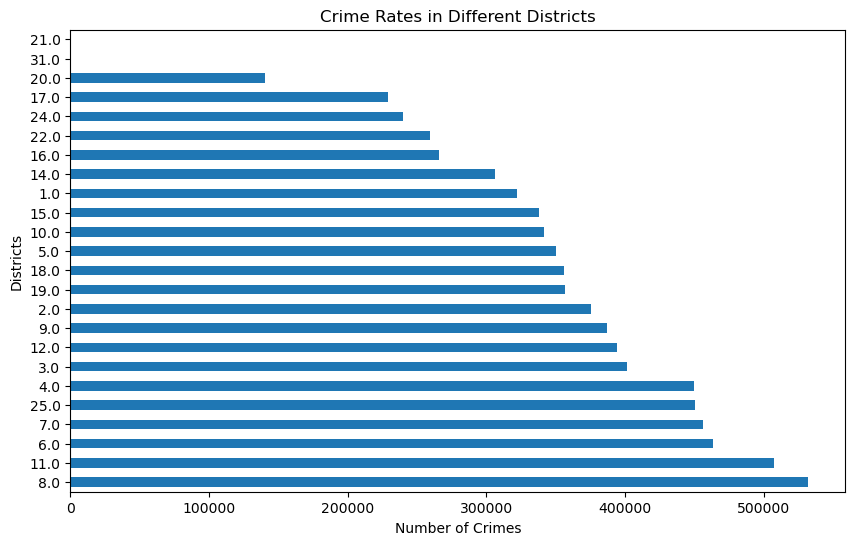

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
district_crime_counts.plot(kind='barh')
plt.title('Crime Rates in Different Districts')
plt.xlabel('Number of Crimes')
plt.ylabel('Districts')
plt.show()

# How did the COVID-19 Pandemic affect overall crime trends in Chicago?

In [35]:
df_ts = df.copy()
df_ts

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1315458,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,STREET,False,False,1421,14.0,NaN,41.910320,-87.702020
1,1310873,01/01/2001 01:00:00 PM,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,True,1522,15.0,NaN,41.870926,-87.756145
2,1315987,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,CHA APARTMENT,False,False,1823,18.0,NaN,41.899860,-87.639877
3,1310586,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,STREET,False,False,911,9.0,NaN,41.798298,-87.692856
4,6808288,01/01/2001 01:00:00 PM,THEFT,FINANCIAL ID THEFT: OVER $300,APARTMENT,False,False,213,2.0,3.0,41.822551,-87.615632
...,...,...,...,...,...,...,...,...,...,...,...,...
211214,13253970,10/24/2023 12:00:00 AM,THEFT,OVER $500,APARTMENT,False,True,421,4.0,7.0,41.753214,-87.557005
211215,13256694,10/24/2023 12:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE - GARAGE,False,False,2512,25.0,30.0,41.926224,-87.775799
211216,13255881,10/24/2023 12:00:00 AM,THEFT,OVER $500,STREET,False,False,1235,12.0,25.0,41.853892,-87.650494
211217,13254770,10/24/2023 12:00:00 AM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,False,False,313,3.0,20.0,41.783386,-87.609645


In [ ]:
df_ts['datetime'] = pd.to_datetime(df['Date'])
df_ts.info()

In [ ]:
df_ts = df_ts.set_index('datetime')
df_ts

In [ ]:
df_ts = df_ts.resample('D').size()

In [ ]:
before_pandemic = df_ts['2018':'2019']
during_pandemic = df_ts['2020':'2021']
after_pandemic = df_ts['2022':'2023']

In [ ]:
import matplotlib.pyplot as plt

window_size = 7  
plt.figure(figsize=(12,3))

for period, label in zip([before_pandemic, during_pandemic, after_pandemic], ['Before', 'During', 'After']):
    rolling_mean = period.rolling(window=window_size).mean()
    plt.plot(rolling_mean, label=label)

plt.xticks(pd.date_range(start='2018', end='2023', freq='Q'), rotation=45)
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(90))

plt.title('Overall Crime Trends Before, During, and After the Pandemic')
plt.xlabel('Time')
plt.ylabel('Average Daily Crimes')
plt.legend()
plt.show();


# How has the variance in crime changed over the years?

In [ ]:
df_var = df_ts.copy()

In [ ]:
data_resampled = df_var.resample('Y').size()
data_resampled

In [ ]:
variance_changes = resampled_data.diff()
